# スニペット集

## ファイルが存在するかを確認する


In [ ]:
import os

os.path.isfile('./hoge.txt')


## ファイルを削除する


In [ ]:
# pip install send2trash

#  ごみ箱に送る
import os
from send2trash import send2trash
send2trash("./hoge.txt")

# 完全に削除する
os.remove('./huga.txt')


## 多重ネストの進捗を表示させる


In [ ]:
from tqdm import tqdm
from time import sleep

for i in tqdm(range(10)):
    for u in tqdm(range(20), leave=False):
        sleep(0.01)


## DataFrame のカラム名を変更する


In [ ]:
import pandas as pd

raw_df = pd.read_csv("hoge.csv")  # 何かしらのデータを読み込んだとする

# 指定した行名列名を変更したい
new_df1 = raw_df.rename(columns={'売上': 'sales'}, index={'一月': 'Jan'})

# 一括で変更したい
new_df2 = raw_df
new_df2.columns = ['売上', '営業利益', '経常利益', '最終利益']


## DataFrame で行 → インデックス・列 → カラム名で参照する


In [ ]:
import pandas as pd

df = pd.read_csv("hoge.csv")  # 何かしらのデータを読み込んだとする

# 2022年2月4日の売上金額を取得したい
val = df.loc[df.date == "2022-02-04", "売上"]

# ちなみにこっちでも同じことができるが、警告が出る
val = df["売上"].loc[df.date == "2022-02-04"]


## ローマ字/かな変換をする


In [ ]:
# !pip install pykakasi
import pykakasi

# 推奨
k = pykakasi.kakasi()
k.convert("今日は晴れ")

# [{'orig': '今日は',
#   'hira': 'こんにちは',
#   'kana': 'コンニチハ',
#   'hepburn': 'konnichiha',
#   'kunrei': 'konnitiha',
#   'passport': 'konnichiha'},
#  {'orig': '晴れ',
#   'hira': 'はれ',
#   'kana': 'ハレ',
#   'hepburn': 'hare',
#   'kunrei': 'hare',
#   'passport': 'hare'}]

# これは古いバージョン
# kakasi = pykakasi.kakasi()  # インスタンスの作成
# kakasi.setMode('H', 'a')  # ひらがなをローマ字に変換するように設定
# kakasi.setMode('K', 'a')  # カタカナをローマ字に変換するように設定
# kakasi.setMode('J', 'a')  # 漢字をローマ字に変換するように設定
# conversion = kakasi.getConverter()  # 上記モード設定の適用
# print(conversion.do("ほげほげ").capitalize())  # -> hogehoge


## 大量のファイルパスをリストで取得する


In [ ]:
from glob import glob

# 「Samples」ファイルにあるCSVファイルを一括パス取得したいとき
pathlist = glob("/~パス中略~/Samples/*.csv")


## キャッシュしながら Pandas_Datareader をつかう


In [ ]:
import pandas_datareader as pdr
from requests_cache import CachedSession
from datetime import timedelta

session = CachedSession(cache_name="cache", backend="sqlite3", expire_after=timedelta(days=5))
session.headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',
    'Accept': 'application/json;charset=utf-8'
}
df = pdr.DataReader("1301.JP", "stooq", "1960-01-05", "2022-01-29", session=session)


## Pickle でインスタンス保存/読込


In [ ]:
import pickle


def save_as_pickle(path: str, object: object, protocol=5) -> None:
    with open(path, mode="wb") as f:
        pickle.dump(object, f, protocol=protocol)


def load_from_pickle(path: str) -> object:
    with open(path, mode='rb') as f:
        return pickle.load(f)


## 文字列のフォーマット


In [ ]:
val = 1023.45678

# f文字列で出力させる(Python3.6以降)
print(f"This value is {val}.")
# => This value is 1023.45678.

# カンマで桁区切りしたい場合はコロンの後にコンマを入れる
# 小数点をn桁で切り捨てたい場合はコロンの後に.nfみたく入れる
print("This value is {:,.2f}.".format(val))
# => This value is 1,023.46.


## numpy よく使う関数


In [ ]:
import numpy as np

np.array([1, 2, 3])  # ListをndArrayに変換する
# array([1, 2, 3])

# 数列生成
np.arange(0, 10, 1)  # 初項0、末項10、公差1の等差数列をつくる
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.geomspace(1, 10, 5)  # 初項1、末項10、項数5の等比数列をつくる
# array([1., 1.77827941, 3.16227766, 5.62341325, 10.])

np.empty(10)  # 空の配列を作る
# array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

np.zeros(10)  # すべてゼロの配列を作る
# array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

np.ones(10)  # すべて1の配列を作る
# array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

np.zeros_like([1, 0, -1])  # 他の配列と同じ形で任意の配列を作る
# array([0, 0, 0])

hoge = np.random.rand(10)  # 何かしらの配列を正規化したい

# 最大値が1に、最小値が-1になるようにする
print(hoge - hoge.min()) / (hoge.max() - hoge.min()) * (hoge / np.abs(hoge))

# 最大値が1に、最小値が0になるようにする
print((hoge - hoge.min()) / (hoge.max() - hoge.min()))


## プロファイリングする


In [ ]:
from line_profiler import LineProfiler


def main():
    for i in range(10000):
        pass  # 何かしらの処理をまわす


pr = LineProfiler()
pr.add_function(main)
pr.runcall(main)
pr.print_stats()


## warning をすべて無視する


In [ ]:
import warnings

warnings.simplefilter('ignore')  # すべての警告を非表示にする
warnings.simplefilter('error')  # すべての警告を例外とする
warnings.resetwarnings()  # warningの設定をリセットする


## OS 情報を取得する


In [ ]:
import platform
platform.system()
# 'Windows'
platform.version()
# '10.0.19041'
platform.platform()
# 'Windows-10-10.0.19041-SP0'


## CPU の型番を取得する


In [ ]:
# !pip install py-cpuinfo
import cpuinfo
print(cpuinfo.get_cpu_info())
# 出力結果は省略。CPUの諸情報がdict形式で返される。
print(cpuinfo.get_cpu_info()["brand_raw"])
# 11th Gen Intel(R) Core(TM) i5-11400F @ 2.60GHz
print(cpuinfo.get_cpu_info()["family"])
# 6
print(cpuinfo.get_cpu_info()["hz_actual_friendly"])
# 2.5920 GHz


## Requests & BeautifulSoup でスクレイピング


In [ ]:
import requests
from bs4 import BeautifulSoup

user_agent = '~ユーザーエージェント~'
header = {'User-Agent': user_agent}
session = requests.session()

res = session.get('https://example.com/', headers=header)

soup = BeautifulSoup(res.text, 'html.parser')
title = soup.select_one("body > div:nth-child(1) > h1")
print(title.text)  # -> Example Domain


## Zip ファイルの中にある txt ファイルなどを読み込む


In [ ]:

import zipfile
zip_file = "hoge.zip"

with zipfile.ZipFile(zip_file) as _myzip:
    for file in _myzip.filelist:  # .filelistでZip内のファイル一覧を取得する
        with _myzip.open(file) as _myfile:  # openを利用してファイルにアクセス
            print(len(_myfile.read()))  # この場合はreadで読み込みを行った


## Windows をスリープ/休止状態にする


In [ ]:
import ctypes

"""
# スリープ
ctypes.windll.PowrProf.SetSuspendState(0, 1, 0)

# 休止状態
ctypes.windll.PowrProf.SetSuspendState(1, 1, 0)
"""


## Windows に通知を送る


In [ ]:
# pip install plyer
from plyer import notification

notification.notify(
    title="ここにタイトルを書く",
    message="ここにメッセージを書く",
    timeout=10
)


## Google Colaboratory でドライブにアクセスする

Google ドライブの hoge というファイルの中にある huga.db を読み込みたいときは以下のようにする。初回実行時、ドライブへのアクセス承認を求められる。


In [ ]:
from google.colab import drive
import sqlite3
base = drive.mount("/content/drive")

path = "/content/drive/MyDrive/hoge/huga.db"

conn = sqlite3.connect(path)


## Matplotlib で一枚のイメージに複数のグラフを貼り付ける


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 4))  # イメージの大きさを指定

x1 = np.random.uniform(0, 100, 20)
y1 = x1 * np.random.uniform(1, 2, 20)

ax1 = fig.add_subplot(1, 2, 1)  # 引数は、縦に何分割、横に何分割、何枚目の画像を指定するか
ax1.scatter(x1, y1)
ax1.set_xlabel("weight [g]")
ax1.set_ylabel("length [cm]")
ax1.set_xlim(0, 110)
ax1.set_ylim(0, 190)

# bottom
x2 = np.array(['S1', 'S2', 'S1', 'S2', 'S4'])
y2 = np.array([12.0, 3.1, 11.8, 2.9, 6.2])
x2_position = np.arange(len(x2))

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(x2_position, y2, tick_label=x2)
ax2.set_xlabel("samples")
ax2.set_ylabel("values")

# show plots
fig.tight_layout()  # サブプロット間の間隔を調整する
fig.show()


## Json を読み込む


In [ ]:
import json

json_file = """
{
    "section1":{
        "key":"key1",
        "number": 1
    },

    "section2":{
        "key":"key2",
        "number": 2
    }
}
"""

setting = json.load(open("hoge.json", "r"))

print(setting["section1"]["number"])


## Json に書き込む


In [ ]:
import json

dict_ = dict([["item", "apple"], ["price", 120]])

with open("./hoge.json", mode="w") as f:
    json.dump(dict_, f, indent=2)


## ファイルのコピー


In [ ]:
import shutil

shutil.copyfile("./hoge.txt", "./huga/hoge.txt")  # ファイルのデータをコピーしますが、パーミッションやメタデータはコピーしません。
shutil.copy("./hoge.txt", "./huga/")  # ファイルのデータとパーミッションもコピーします。
shutil.copy2("./hoge.txt", "./huga/")  # ファイルのデータとパーミッションに加え、ファイルの作成時間や変更時間などのメタデータもコピーします。


## Str を n 文字以下に丸める


In [ ]:
text = "hoge"

# 単にスライスを使えばいい
shorten_text = text[:50]  # 50文字"以下"に収めてくれる

print(shorten_text)


## テキストファイルを書き込む/読み込む

| mode | 意味                                                       |
| ---- | ---------------------------------------------------------- |
| r    | 既に存在するファイルを読み込む（ファイルが無ければエラー） |
| w    | ファイルに書き込む（既に有れば、まず内容が消される）       |
| x    | ファイルに書き込む（既に有ればエラー）                     |
| a    | ファイルに追記（既存の内容はそのまま）                     |


In [ ]:
with open("hoge.txt", mode="w") as f:
    f.write("文字列を書き込む")
    f.writelines("リストを書き込み")


## 表をインデックスに合わせながら結合する


In [ ]:
import pandas as pd

df1 = pd.DataFrame([
    [1, "11", "111"],
    [2, "22", "222"],
], columns=["num", "num_str", "three"])

df2 = pd.DataFrame([
    [2, "22", "2222"],
    [3, "33", "3333"],
    [0, "00", "0000"]
], columns=["num", "num_str", "four"])

df = pd.merge(df1, df2, on="num", how="outer", sort=True, suffixes=("", "___"))
df["num_str"].update(df["num_str___"])
df = df[[x for x in df.columns if not x.endswith("___")]]

#    num num_str three  four
# 0    0      00   NaN  0000
# 1    1      11   111   NaN
# 2    2      22   222  2222
# 3    3      33   NaN  3333


## list から dict に変換する


In [ ]:
# そのままでいい

something_list = [
    ["name", "taro"],
    ["age", 16],
    ["from", "japan"]
]

print(dict(something_list))  # {'name': 'taro', 'age': 16, 'from': 'japan'}


## SQLite3 で日本語カラム名を使う


In [ ]:
import sqlite3
import pandas

conn = sqlite3.connect(":memory:")
cur = conn.cursor()

# 日本語のテーブル名/カラム名は半角英数字記号で囲めばイケる（ただしピリオド・ハイフンは禁止）
# こんなことしなくても日本語使える…？
cur.execute("CREATE TABLE [ホゲテーブル] ([年齢] INT NOT NULL PRIMARY KEY)")
cur.execute("INSERT INTO [ホゲテーブル] ([年齢]) VALUES(12)")

conn.commit()

print(pandas.read_sql("SELECT [年齢] FROM [ホゲテーブル]", conn))

conn.close()


## 正規表現いろいろ


In [ ]:
import re

raw_text = "あいうえお漢字something12345**++"

print("アルファベットを消す", re.sub("[a-z]", "", raw_text))
print("アルファベットを残す", re.sub("[^a-z]", "", raw_text))
print("指定した記号を消す", re.sub("[oお5]", "", raw_text))
print("数字を消す", re.sub("[0-9]", "", raw_text))
print("数字を残す", re.sub("[^0-9]", "", raw_text))
print("ひらがなを消す", re.sub("[あ-ん]", "", raw_text))

# アルファベットを消す あいうえお漢字12345**++
# アルファベットを残す something
# 指定した記号を消す あいうえ漢字smething1234**++
# 数字を消す あいうえお漢字something**++
# 数字を残す 12345
# ひらがなを消す 漢字something12345**++


## SQLite3 の構文など

Python の Sqlite3 で使う SQL 構文。基本的に予約語は大文字で表記すると処理が早くなるらしい。


In [ ]:
-- テーブル作成
CREATE TABLE table_name1(column1 INTEGER, column2 TEXT);
CREATE TABLE IF NOT EXISTS table_name2(column1 INTEGER UNIQUE PRIMARY KEY, column2 TEXT); /* すでにテーブルが存在するときはスルー */
CREATE TABLE IF NOT EXISTS table_name3(column1 INTEGER NOT NULL UNIQUE PRIMARY KEY, column2 TEXT); /* Null値・主キー・重複の扱いを指定する */

-- 挿入
INSERT INTO table_name(column1, column2) VALUES(10, 10); /* 基本的な挿入 */
INSERT OR IGNORE INTO table_name(column1, column2) VALUES(10, 10); /* UNIQUEなどで挿入できないときはスルー */

-- 取得
SELECT column1,column2 FROM table_name WHERE column1 == 10;
SELECT column1,column2 FROM table_name LIMIT 10; /* 先頭からn行のみを取得すると制限する */
SELECT column1 FROM main WHERE column1 IS NOT NULL; /* NULL以外を取得する(演算子[!=]は使えない) */
SELECT column1 FROM main ORDER BY column1 DESC; /* 降順 */
SELECT column1 FROM main ORDER BY column1 ASC; /* 昇順 */
SELECT * FROM (
    SELECT row_index,dense_rank() OVER(ORDER BY date_str DESC) AS rank_result FROM main ORDER BY row_index DESC
) WHERE rank_result <= 5; /* 最新n行を取得する, DENSE_RANKは同率n位を許すランク付け関数, SELECTは重ねて使う */
SELECT column1 FROM main WHERE column1 IN (1,2,3) /* 複数条件をinで表現する */

-- 削除
DELETE FROM table_name WHERE column1 == 1234; /* 表内のデータを削除する。条件指定できる。遅い。 */
TRUNCATE TABLE table_name; /* 表内のデータを全削除する。早い。 */
DROP TABLE table_name; /* 表内のオブジェクトを完全に削除する。 */

-- 更新
UPDATE table_name SET column1 = 222 WHERE column1 = 10000; /* 基本的な更新 */
UPDATE table_name SET column1 = ?, column2 = ? WHERE column3 = 10; /* 2次元タプルで数値を当てはめる */
UPDATE table_name SET column1 = REPLACE(column1, "before", "after"); /* 文字列の一括置き換え */

-- データベース内のテーブルの一覧を取得する
SELECT name FROM sqlite_master WHERE type="table";
SELECT * FROM sqlite_master; /* テーブル名の他にもSQL構文(CREATE TABLE...)を取得することもできる */

-- スキーマ情報（カラム名やデータ型など）を取得する
PRAGMA table_info(table_name); /* cid, name, type, notnull, default_value, primary_key */

-- 日別週別で集計する
-- 集計に使える集合関数は[SUM, MAX, MIN, AVG, COUNT] いずれもNullを集計対象外とする
-- new_dateにあたるカラムはどんな名前を使っても良い
-- 構文としては「Select 対象行,集計行 From テーブル Group By 集計行;」となっている
SELECT count(num) as count_num, STRFTIME("%H:%M:%S", _date) AS new_date FROM table1 GROUP BY new_date; /* 秒別 */
SELECT count(num) as count_num, STRFTIME("%H:%M", _date) AS new_date FROM table1 GROUP BY new_date; /* 分別 */
SELECT count(num) as count_num, STRFTIME("%H", _date) AS new_date FROM table1 GROUP BY new_date; /* 時間別 */
SELECT AVG(num) AS ave_num, STRFTIME('%Y-%m-%d', _date) AS new_date FROM table1 GROUP BY new_date; /* 日別平均 */
SELECT MIN(num) AS min_num, STRFTIME('%Y-%W', _date) AS new_date FROM table1 GROUP BY new_date; /* 週の最低(対象年の第何周目かで集計する) */
SELECT COUNT(num) AS count_num, STRFTIME('%Y-%m', _date) AS new_date FROM table1 GROUP BY new_date; /* 月別個数 */


## ハッシュ値を求める


In [2]:
import hashlib

print(hashlib.algorithms_guaranteed)  # 利用可能なハッシュ化アルゴリズム

text1 = "Python"

print("md5", hashlib.md5(text1.encode()).hexdigest())  # 偶発的な衝突確率は2e-64だが、脆弱なハッシュ関数である。
print("sha224", hashlib.sha224(text1.encode()).hexdigest())
print("sha256", hashlib.sha256(text1.encode()).hexdigest())  # セキュリティ目的で利用するにはSHA256/SHA512を使うことが望ましい。
print("sha512", hashlib.sha512(text1.encode()).hexdigest())

with open("./dir/hoge.txt", mode="rb") as file:  # rb -> バイナリ読み込みで開く
    print("sha256", hashlib.sha256(file.read()).hexdigest())

# {'sha3_384', 'sha256', 'md5', 'blake2b', 'sha1', 'sha3_512', 'sha3_224', 'shake_128', 'blake2s', 'sha384', 'sha512', 'sha224', 'shake_256', 'sha3_256'}
# md5 a7f5f35426b927411fc9231b56382173
# sha224 f8fef02326b9f70d67c68faefc4d41b3fd039d77e11643bccab9d47a
# sha256 18885f27b5af9012df19e496460f9294d5ab76128824c6f993787004f6d9a7db
# sha512 fd9d4d5b7a8a8fae6b1bc099b799110f7e4338606e2610f5d9506a4346e0c3bfbc525f4eed1e05aa8c6f46b8efff526ec48b500928a1b341ade5a7855f533932
# sha256 2f51ac3df8b54899eff67e7fbe5d367c52501aa220308c81236a0e34bc7f39ac


{'sha3_384', 'sha256', 'md5', 'blake2b', 'sha1', 'sha3_512', 'sha3_224', 'shake_128', 'blake2s', 'sha384', 'sha512', 'sha224', 'shake_256', 'sha3_256'}
md5 a7f5f35426b927411fc9231b56382173
sha224 f8fef02326b9f70d67c68faefc4d41b3fd039d77e11643bccab9d47a
sha256 18885f27b5af9012df19e496460f9294d5ab76128824c6f993787004f6d9a7db
sha512 fd9d4d5b7a8a8fae6b1bc099b799110f7e4338606e2610f5d9506a4346e0c3bfbc525f4eed1e05aa8c6f46b8efff526ec48b500928a1b341ade5a7855f533932
sha256 2f51ac3df8b54899eff67e7fbe5d367c52501aa220308c81236a0e34bc7f39ac


## /n とかを削除


In [2]:
text = "22/09/30 15:15"

print(text.split())  # ['22/09/30', '15:15']


['22/09/30', '15:15']


## 日付を扱う

以下、全て 0 埋めした 10 進数

例：2022-10-02 20:45:58.870211

| 書式 | 意味               | 例     |
| ---- | ------------------ | ------ |
| %d   | 月中の日にち       | 02     |
| %m   | 月                 | 10     |
| %y   | 西暦の下 2 桁      | 22     |
| %Y   | 西暦 4 桁          | 2022   |
| %H   | 時 （24 時間表記） | 20     |
| %I   | 時 （12 時間表記） | 08     |
| %M   | 分                 | 45     |
| %S   | 秒                 | 58     |
| %f   | マイクロ秒（6 桁） | 870211 |


In [1]:
from datetime import datetime as dt

print(dt.strftime(dt.now(), "%Y/%M/%d"))  # 2022/38/02

print(dt.strftime(dt.today(), "%y/%M/%d"))  # 22/38/02

print(dt.strptime("22/09/30 15:00", "%y/%m/%d %H:%M"))  # 2022-09-30 15:00:00


2022/24/06
22/24/06
2022-09-30 15:00:00


## エラーを表示


In [7]:
import traceback

try:
    a = 10 / 0
except:
    traceback.print_exc()

# Traceback (most recent call last):
#  File "C:\Users\Haya\AppData\Local\Temp/ipykernel_6764/3739262623.py", line 4, in <module>
#    a = 10 / 0
# ZeroDivisionError: division by zero


Traceback (most recent call last):
  File "C:\Users\Haya\AppData\Local\Temp/ipykernel_6764/3739262623.py", line 4, in <module>
    a = 10 / 0
ZeroDivisionError: division by zero


## Sklearn を使う


0.9666666666666667


c:\Users\Haya\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


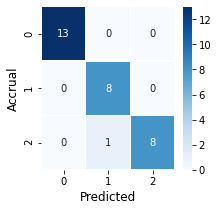

In [16]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.2,
)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(precision_score(y_test, y_pred, average="micro"))

plt.figure(figsize=(3, 3))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues', linewidth=0.3)
ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Accrual", fontsize=12)
plt.show()


## 単調増加・減少を判定する


In [1]:
import numpy as np

a = [1, 2, 3, 4, 5]
b = [9, 8, 7, 6, 5]
c = [1, 5, 3, 6, 4]

def is_monotonic(x):
    diff = np.diff(x)
    return np.all(diff <= 0) or np.all(diff >= 0)

print(is_monotonic(a)) # True
print(is_monotonic(b)) # True
print(is_monotonic(c)) # False


True
True
False


## グラフを表示する


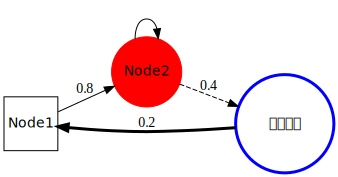

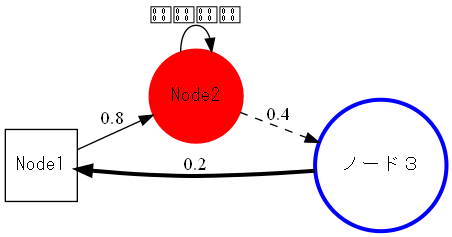

In [13]:
from graphviz import Digraph
from IPython.display import Image

G = Digraph(format="png")  # 拡張子の設定 (pdf/pngなど)

# 全ノードに対する設定
G.attr("node", shape="square", color="black", fontname='MS Gothic')
G.attr("graph", rankdir="LR")
# shape -> square 四角形 / cicle 円
# fontname -> 日本語を利用するためには日本語対応フォントを指定する("Meiryo", "Yu Gothic", "MS Mincho"など)

# エッジ/辺の設定
G.edge("Node1", "Node2", label="0.8")
G.edge("Node2", "ノード３", label="0.4", style='dashed')  # パスを破線に
G.edge("ノード３", "Node1", label="0.2", penwidth="3")  # パスを少し太く
G.edge("Node2", "Node2", label="自分自身")  # 自分自身へのパス

# ノード/頂点の設定
G.node("ノード３", shape="circle", color="blue", penwidth="3")
G.node("Node2", shape="circle", style="filled", color="red")

# Jupyterに表示
display(G)

# PNG/PDFに出力し、Jupyterに表示
G.render("Digraph.gv")
Image(filename='Digraph.gv.png')
